**K-means clustering**

**(Code: Subhajit Das)**

**What is K-means clustering:**

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

**Where we can use K-means clustering:**

K-means clustering is used in a variety of real-life scenarios, including:

1. **Academic Performance**: Based on scores, students are categorized into grades like A, B, or C.

2. **Diagnostic Systems**: It can be used in healthcare to group patients based on their symptoms or other medical data.

3. **Search Engines**: Search engines use clustering to group similar web pages together, improving the relevance of search results.

4. **Wireless Sensor Networks**: Sensor data can be grouped based on similarity, which can help in identifying patterns and making predictions.

5. **Document Classification**: Cluster documents into multiple categories based on tags, topics, and the content of the document.

6. **Delivery Store Optimization**: Optimize the process of good delivery using truck drones by using a combination of k-means to find the optimal number of launch locations.

7. **Identifying Crime-Prone Areas**: By clustering geographical crime data, authorities can identify areas that are prone to crime and take preventive measures.

8. **Customer Segmentation**: Businesses can use k-means clustering to segment their customers into different groups based on purchasing behavior, demographics, etc. This can help in targeted marketing and improving customer service.

9. **Insurance Fraud Detection**: Insurance companies can use k-means clustering to identify patterns in claims data that might indicate fraudulent activity.

10. **Public Transport Data Analysis**: Public transport data can be clustered to identify busy routes, peak travel times, etc., which can help in optimizing schedules.

Remember, the effectiveness of k-means clustering depends on the nature of the data and the appropriateness of the 'k' value chosen.

**How K-means clustering works:**

K-means clustering is a type of unsupervised learning algorithm used to partition a dataset into K distinct, non-overlapping clusters. Here's how it works:

1. **Initialization**: Select K points as the initial centroids from the dataset, where K is the number of clusters you want to create.

2. **Assignment**: Assign each data point to the nearest centroid. This forms K clusters.

3. **Update**: Calculate the new centroid (mean) of each cluster. This is done by finding the average of all data points in the cluster.

4. **Iteration**: Repeat the assignment and update steps until the centroids do not change significantly, or a set number of iterations is reached.

The goal of K-means clustering is to minimize the sum of distances between the data points and their corresponding cluster centroids. This algorithm is widely used in machine learning and data science to discover patterns and structures in unlabeled data.

It's important to note that the initial selection of centroids can affect the final output. Therefore, the algorithm may give different results each time it's run with different initial centroids. To mitigate this, the algorithm is often run multiple times with different starting conditions, and the most common output is chosen.

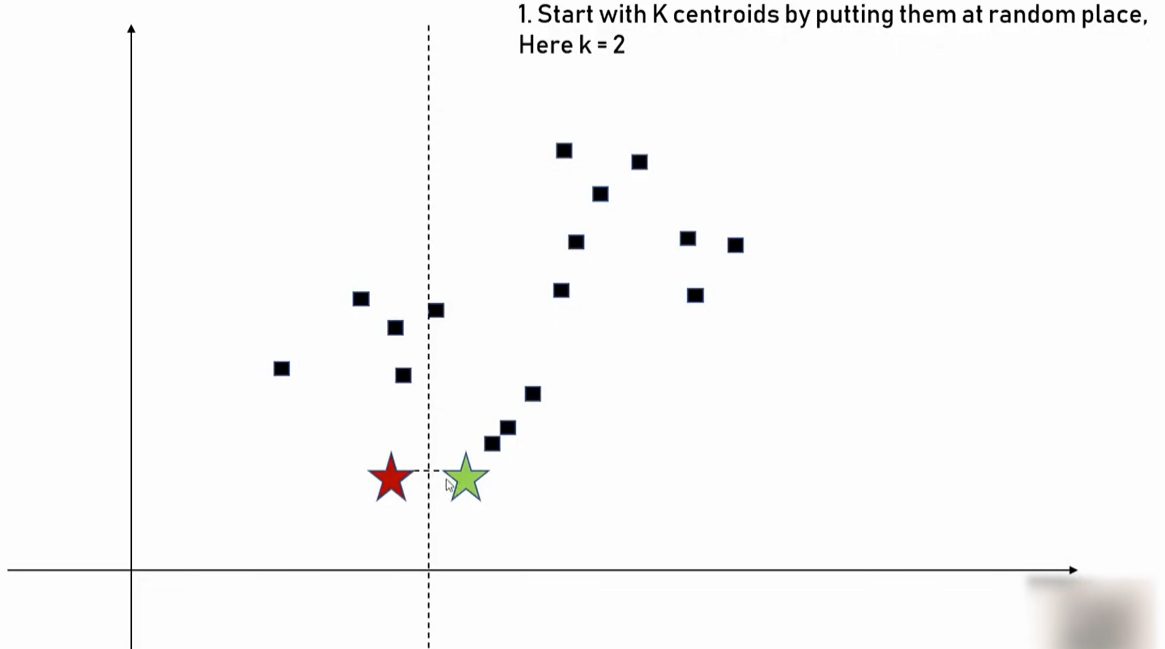

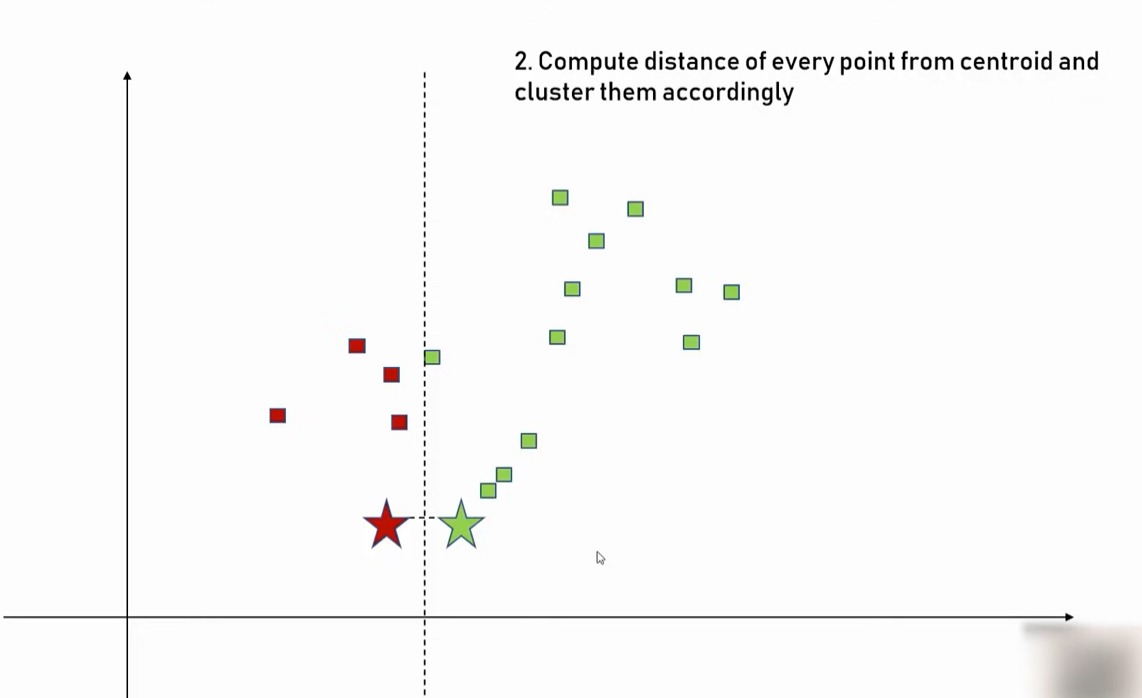

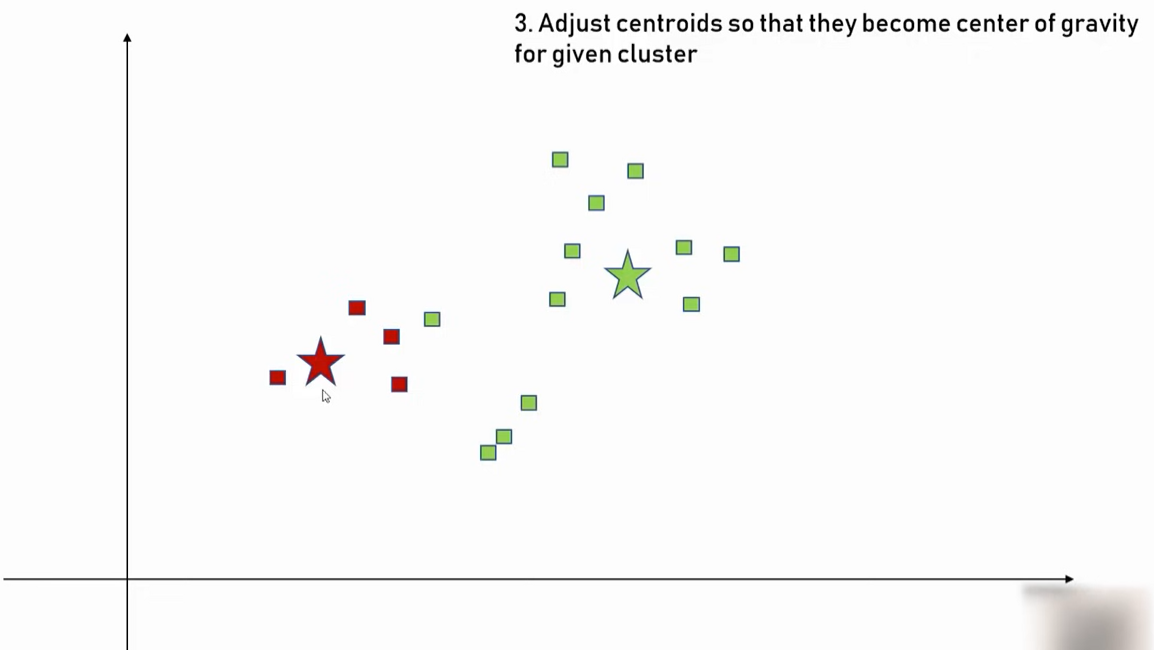

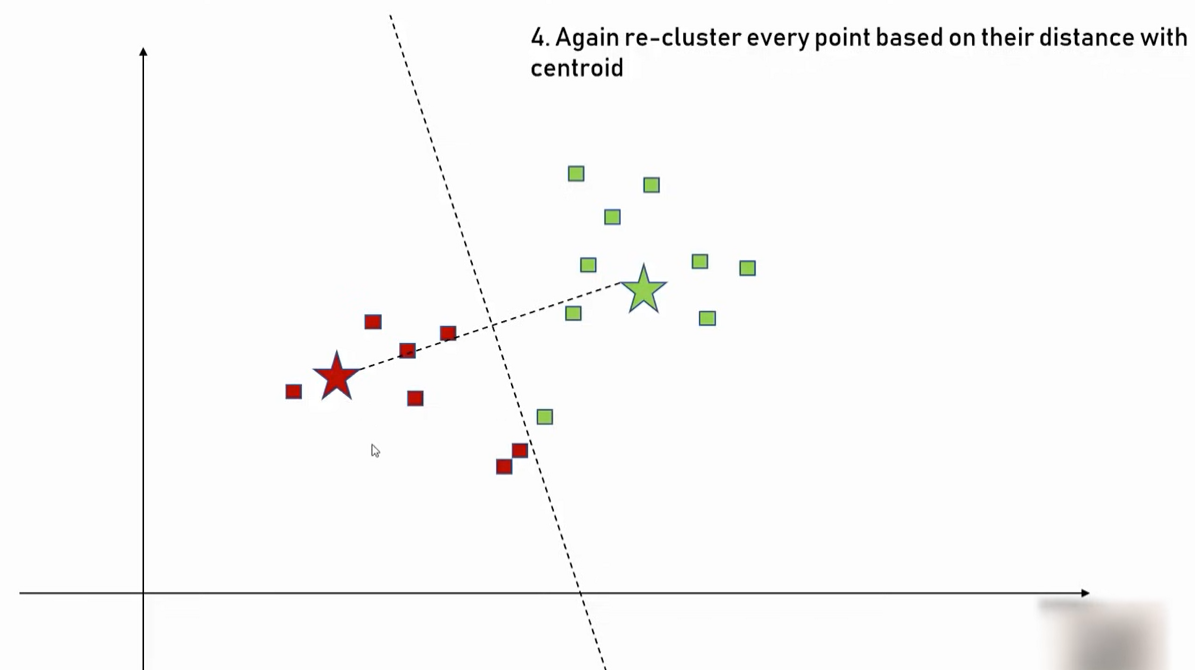

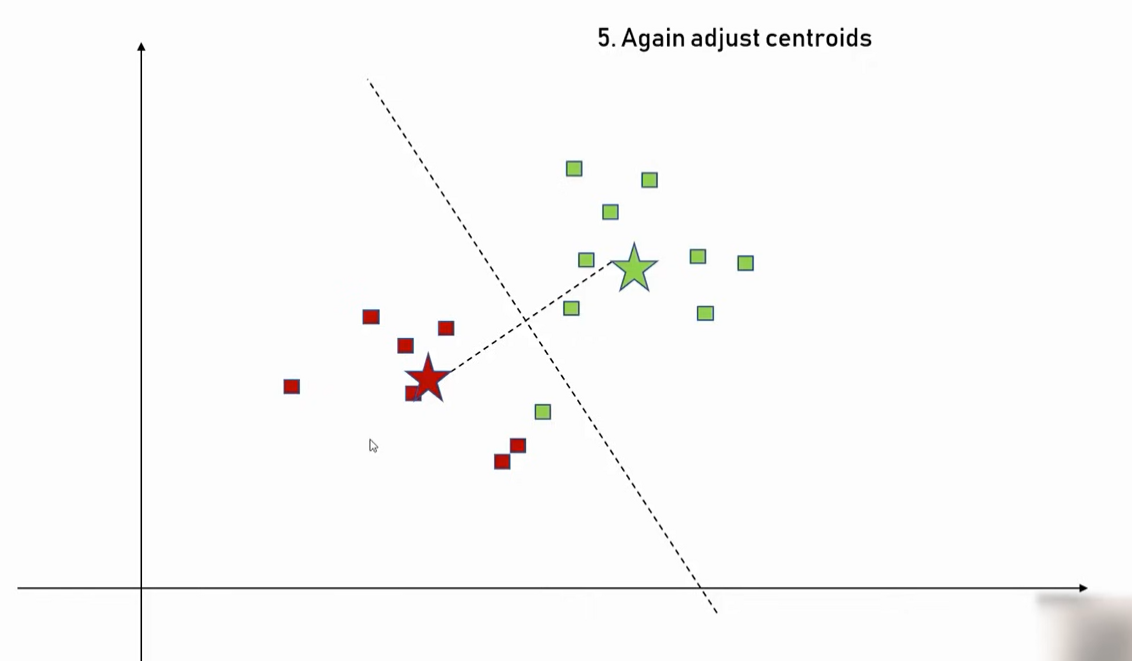

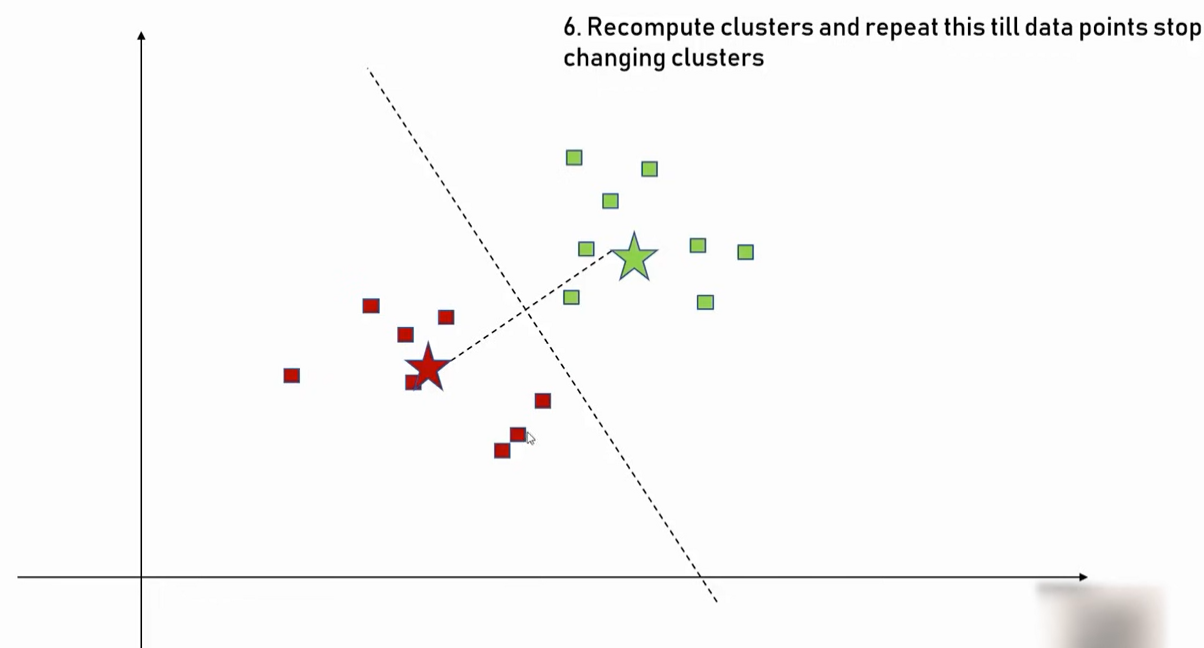

**How we can choose factor 'k' in K means clustering?**

Choosing the right number of clusters, `k`, in K-means clustering is a critical step. Here are some methods to determine the optimal `k`:

1. **Elbow Method**: This method involves plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use¹. The basic idea behind this method is that it plots the various values of cost with changing `k`. As the value of `k` increases, there will be fewer elements in the cluster¹. The point where this distortion declines the most is the elbow point.

2. **Silhouette Method**: This method calculates the average distance between each sample and all other points in the same class (a), the average distance between each sample and all other points in the nearest cluster (b), and then calculates the silhouette score (s) using the formula `s = (b - a) / max(a, b)`. The optimal number of clusters `k` is the one that maximizes the average silhouette over a range of possible values for `k`.

3. **Gap Statistic Method**: This method compares the total intra-cluster variation for different values of `k` with their expected values under null reference distribution of the data. The estimate of the optimal clusters will be value that maximize the gap statistic (i.e., that yields the largest gap statistic). This means that the clustering structure is far away from the random uniform distribution of points.

Remember, the effectiveness of these methods depends on the nature of the data and the appropriateness of the 'k' value chosen. It's often helpful to experiment with different values for `k` to see what works best for your specific dataset.

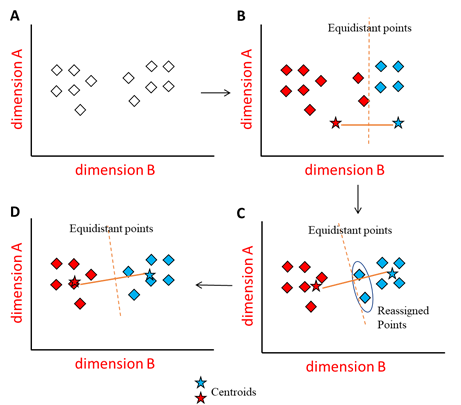

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Customer Segmentation**

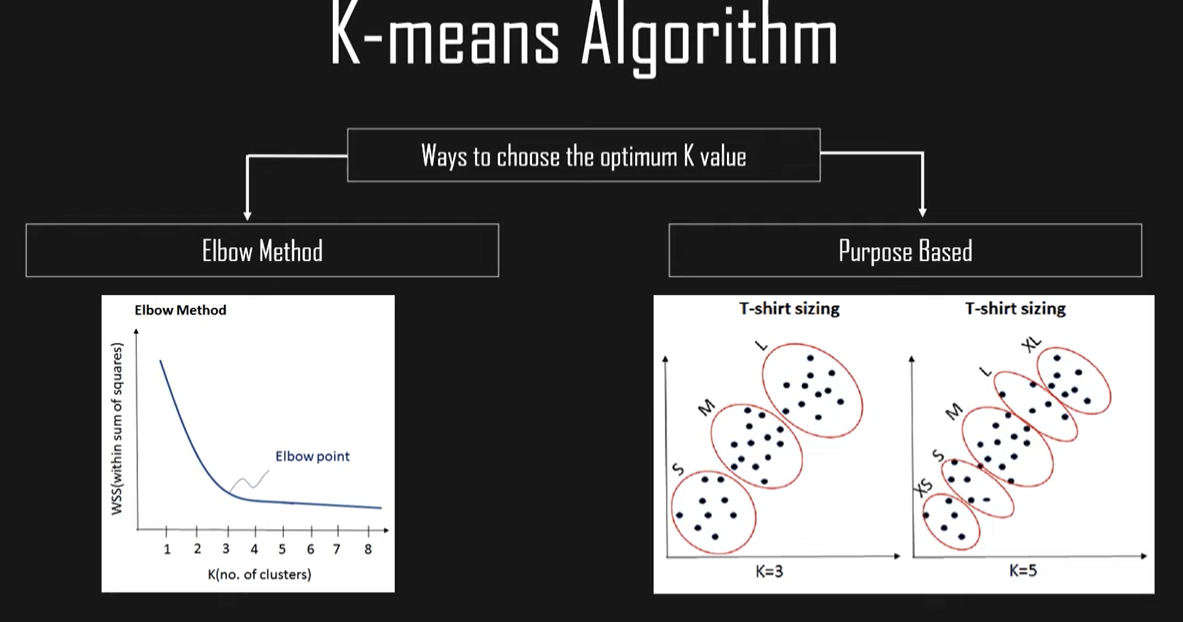

In [ ]:
customer_df = pd.read_csv("/content/drive/MyDrive/ML and DL DataSets/10_Mall_Customers.csv")
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_df.shape

(200, 5)

In [ ]:
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Dropping Customer ID column becasuse it's not needed
customer_df.drop(['CustomerID'], axis = 1, inplace = True)

In [ ]:
customer_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**Analysis of Customer Segmentation Data**

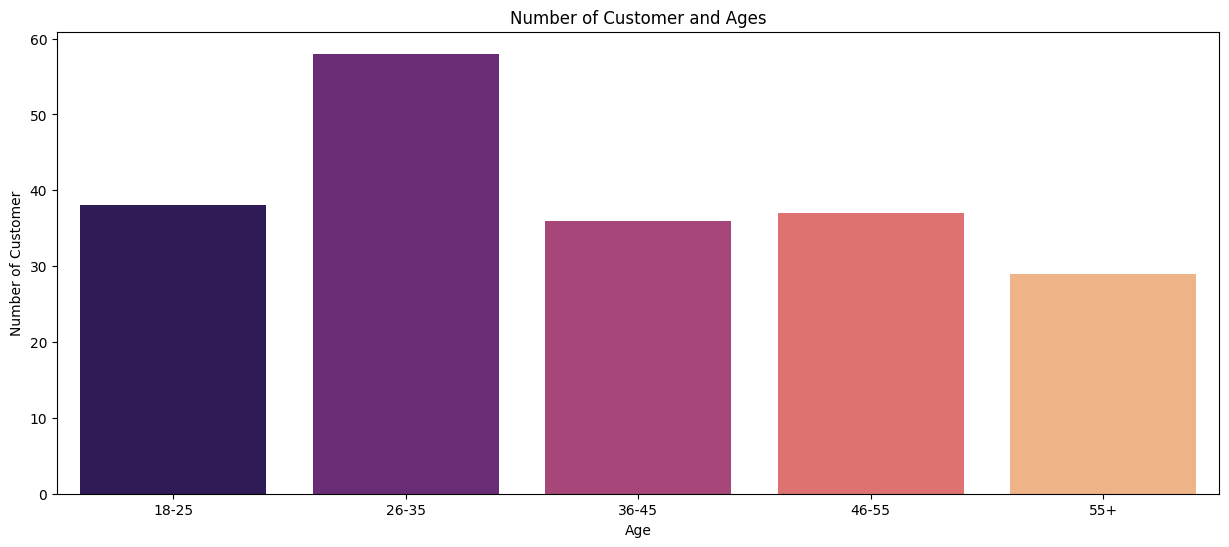

In [ ]:
# Based on Age
age_18_25 = customer_df.Age[(customer_df.Age >= 18) & (customer_df.Age <= 25)] # Customers who are between 18 and 25 years old.
age_26_35 = customer_df.Age[(customer_df.Age > 26) & (customer_df.Age <= 35)]
age_36_45 = customer_df.Age[(customer_df.Age >= 36) & (customer_df.Age <= 45)]
age_46_55 = customer_df.Age[(customer_df.Age >= 46) & (customer_df.Age <= 55)]
age_55above = customer_df.Age [customer_df.Age >= 56] # Customers who are 56 years old or older.

agex = ["18-25","26-35","36-45","46-55","55+"] # agex list contains the labels for these age groups
agey = [len (age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]
# counts the number of customers in each age group using the len() function, which returns the length of each group. These counts are stored in the agey list

plt.figure(figsize=(15,6))
sns.barplot (x = agex, y = agey, palette="magma") # Bar plot with the age groups on the x-axis and the counts on the y-axis

plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")

plt.show()

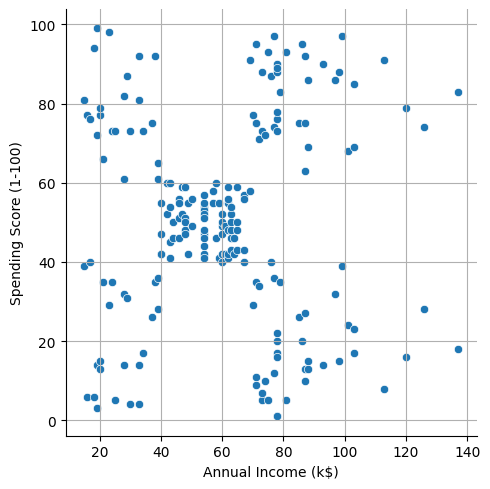

In [ ]:
# Relationship between spending and annual income
sns.relplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = customer_df) # relplot() function in Seaborn is used to create figure-level relational plots
plt.grid()

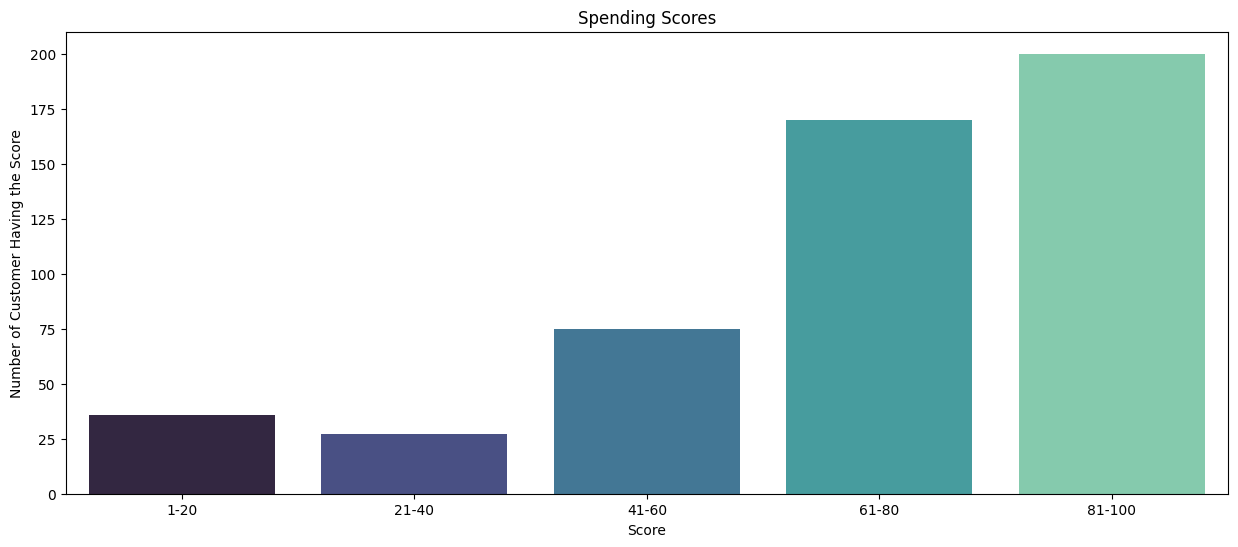

In [ ]:
# By spending pattern
ss_1_20 = customer_df["Spending Score (1-100)"][(customer_df["Spending Score (1-100)"] >= 1) & (customer_df["Spending Score (1-100)"] <= 20)] # Customers whose spending score are between 1 to 20k $
ss_21_40 = customer_df["Spending Score (1-100)"][(customer_df["Spending Score (1-100)"] >= 21) & (customer_df["Spending Score (1-100)"] <= 40)]
ss_41_60 = customer_df ["Spending Score (1-100)"] [(customer_df["Spending Score (1-100)"] >= 41) & (customer_df["Spending Score (1-100)"] <= 60)]
ss_61_80 = customer_df ["Spending Score (1-100)"] [(customer_df["Spending Score (1-100)"] >- 61) & (customer_df["Spending Score (1-100)"] <=80)]
ss_81_100 = customer_df["Spending Score (1-100)"][(customer_df["Spending Score (1-100)"] >- 81) & (customer_df["Spending Score (1-100)"] <= 100)] # Customers whose spending score are above 100k $

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len (ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

plt. figure(figsize=(15,6))
sns.barplot (x = ssx, y = ssy, palette = "mako")

plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")

plt.show()

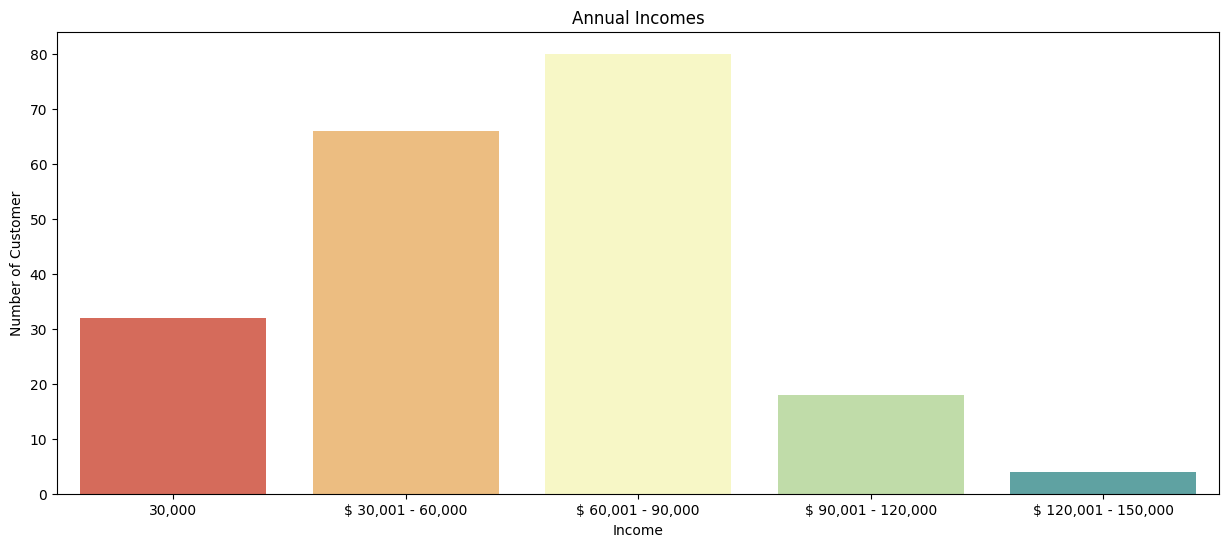

In [ ]:
# By Annual income
ai0_30 = customer_df["Annual Income (k$)"] [(customer_df["Annual Income (k$)"] >= 0) & (customer_df["Annual Income (k$)"] <= 30)] # Customers whose annual income are between 0 to 30k $
ai31_60 = customer_df["Annual Income (k$)"][(customer_df["Annual Income (k$)"] >= 31) & (customer_df["Annual Income (k$)"] <= 60)]
ai61_90 = customer_df["Annual Income (k$)"][(customer_df["Annual Income (k$)"] >= 61) & (customer_df["Annual Income (k$)"] <= 90)]
ai91_120 = customer_df["Annual Income (k$)"][(customer_df ["Annual Income (k$)"] >= 91) & (customer_df["Annual Income (k$)"] <= 120)]
ai121_150 = customer_df["Annual Income (k$)"][(customer_df["Annual Income (k$)"] >= 121) & (customer_df["Annual Income (k$)"] <= 150)] # Customers whose annual income are above 150k $


aix = ["30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120. values), len(ai121_150.values)]

plt.figure(figsize = (15,6))
sns.barplot (x = aix, y = aiy, palette="Spectral")

plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")

plt.show()

**Parameters used in K-means Clustering():**

The parameters used in K-means clustering include:

1. **Number of clusters (K)**: The number of clusters you want to group your data points into, has to be predefined.
2. **Initial Values/ Seeds**: The choice of the initial cluster centers can have an impact on the final cluster formation.
3. **Outliers**: Cluster formation is very sensitive to the presence of outliers.
4. **n_clusters**: The number of clusters to form as well as the number of centroids to generate.
5. **init**: The method for initialization, either ‘k-means++’ or ‘random’.
6. **n_init**: Number of times the k-means algorithm is run with different centroid seeds.
7. **max_iter**: Maximum number of iterations of the k-means algorithm for a single run.
8. **tol**: Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.
9. **verbose**: Verbosity mode.
10. **random_state**: Determines random number generation for centroid initialization.
11. **copy_x**: When pre-computing distances it is more numerically accurate to center the data first.

**Creating Clustering (Age and Spending Score)**

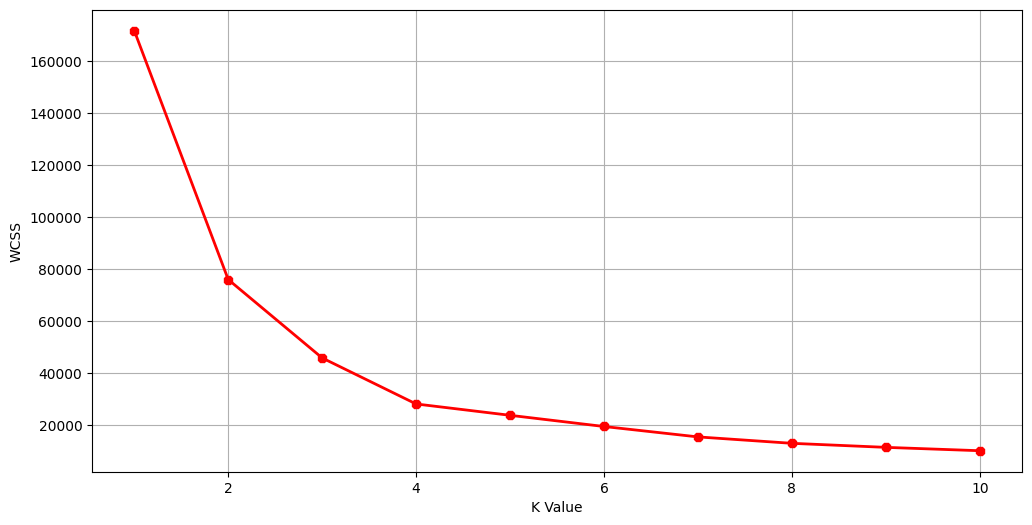

In [ ]:
X1 = customer_df.loc[:, ["Age", "Spending Score (1-100)"]].values
# Two columns from the customer_df DataFrame: ‘Age’ and ‘Spending Score (1-100)’. The values of these columns are stored in the X1 array

from sklearn.cluster import KMeans # KMeans class from the sklearn.cluster module is imported.
WCSS=[] # An empty list WCSS is created to store the WCSS values for different numbers of clusters

for k in range (1,11): # For loop is used to perform K-means clustering for k ranging from 1 to 10. For each k
  kmeans = KMeans(n_clusters = k, init = "k-means++", n_init = 10)# KMeans object is created with n_clusters set to k and init set to ‘k-means++’, which is an initialize method that speeds up convergence
  kmeans.fit(X1) # fit() method is called on the KMeans object to perform the clustering on the X1 data
  WCSS.append(kmeans.inertia_) # inertia_ attribute of the KMeans object, which gives the WCSS for the clustering, is appended to the WCSS list

plt.figure(figsize=(12,6))
plt.grid()

#  Code creates a line plot of the WCSS values against the number of clusters. The plt.plot()
plt.plot(range (1,11),
         WCSS,
         linewidth=2,
         color="red",
         marker ="8")

plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()
# It as an elbow plot, can be used to choose an appropriate number of clusters for the K-means algorithm by looking for an ‘elbow’ where the rate of decrease of WCSS slows down significantly.

In [ ]:
cluster_age = KMeans(n_clusters = 4) # KMeans object named cluster_age is created with n_clusters set to 4. This means that the K-means algorithm will try to find 4 clusters in the data

points_age = cluster_age.fit_predict(X1) # fit_predict() method is called on the cluster_age object with X1 as the argument. This method performs the clustering on the X1 data and predicts the cluster.
print(points_age)

[1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 1 1 3 2 1 2 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3
 2 3 2 0 2 0 1 3 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 2 1 2 0 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 0 2
 3 2 3 2 3 2 3 2 3 2 3 2 0 2 3 2 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 2 3 2 3 2 1
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(cluster_age. cluster_centers_) # Represents the coordinates of the cluster centers that the K-means algorithm has computed

[[55.70833333 48.22916667]
 [27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]]


In [ ]:
print(kmeans.cluster_centers_)

[[64.85       49.85      ]
 [41.9047619  32.23809524]
 [31.52       91.32      ]
 [25.61904762 57.0952381 ]
 [45.0625     14.75      ]
 [24.41176471 42.29411765]
 [48.14814815 49.51851852]
 [28.18181818  7.45454545]
 [29.125      75.34375   ]
 [58.9         9.9       ]]


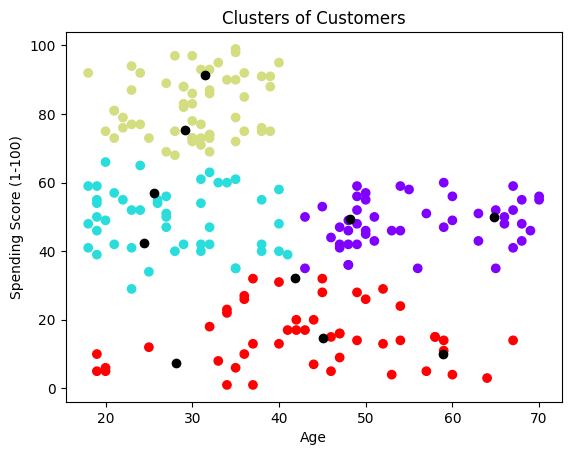

In [ ]:
plt.scatter (X1[:,0], # represents all the values in the first column of X1
             X1[:,1], # ‘Age’ and ‘Spending Score (1-100)’ values from the X1 array. X1[:,1] represents all the values in the second column of X1
             c = cluster_age.labels_, # c parameter is set to cluster_age.labels_, which is an array of cluster assignments for each data point in X1
             cmap = 'rainbow')

plt.scatter (kmeans.cluster_centers_[:,0], # represents all the values in the first column of the cluster centers, which is the ‘Age’ values of the cluster centers
             kmeans.cluster_centers_[:,1], # represents all the values in the second column of the cluster centers, which is the ‘Spending Score (1-100)’ values of the cluster centers
             color='black')

plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

**Creating Clustering (Annual Income and Spending Score)**

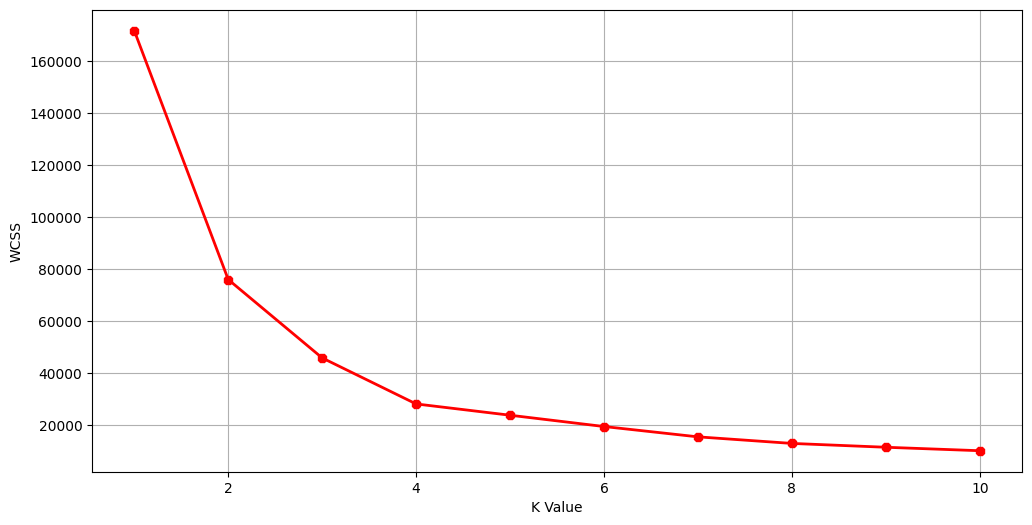

In [ ]:
X2 = customer_df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]]

WCSS=[]

for k in range (1,11):
  kmeans = KMeans(n_clusters = k, init = "k-means++", n_init = 10)
  kmeans.fit(X1)
  WCSS.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()

plt.plot(range (1,11),
         WCSS,
         linewidth=2,
         color="red",
         marker ="8")

plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [ ]:
cluster_income = KMeans(n_clusters = 5, n_init = 10)

points_income = cluster_income.fit_predict(X2)
print(points_income)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 2 3 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 4 1 4 2 4 1 4 1 4 2 4 1 4 1 4 1 4 1 4 2 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [ ]:
print(cluster_income.cluster_centers_)

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]]


**Combine Age, Annual Income and Spending Score Together**

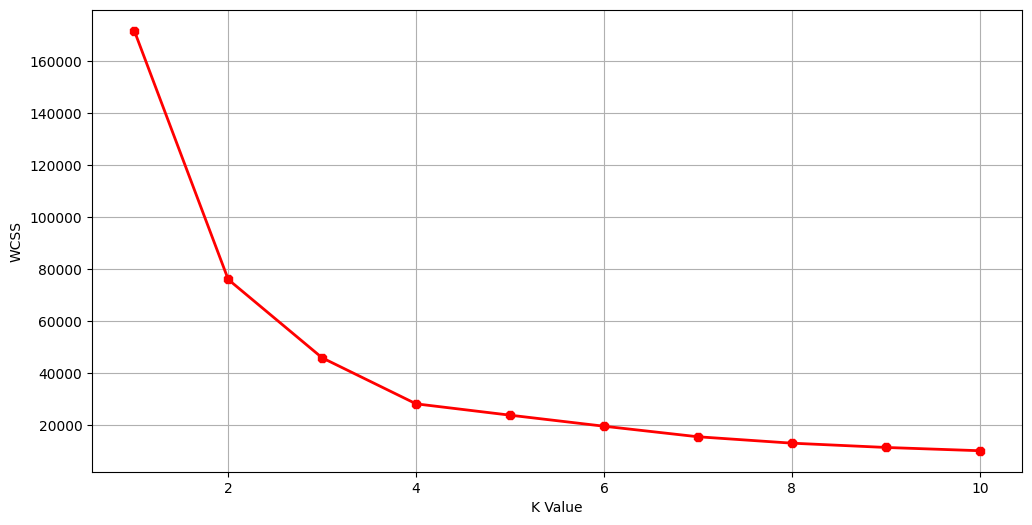

In [ ]:
X3 = customer_df.iloc[:, 1:]

WCSS=[]

for k in range (1,11):
  kmeans = KMeans(n_clusters = k, init = "k-means++", n_init = 10)
  kmeans.fit(X1)
  WCSS.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()

plt.plot(range (1,11),
         WCSS,
         linewidth=2,
         color="red",
         marker ="8")

plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [ ]:
cluster = KMeans(n_clusters = 5, n_init = 10)

points = cluster.fit_predict(X3)
print(points)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [ ]:
print(cluster.cluster_centers_)

[[43.72727273 55.48051948 49.32467532]
 [32.69230769 86.53846154 82.12820513]
 [40.66666667 87.75       17.58333333]
 [24.96       28.04       77.        ]
 [45.2173913  26.30434783 20.91304348]]


**Separating Features and Labels**

In [ ]:
x = customer_df[['Age', 'Annual Income (k$)']]
x.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [ ]:
y = customer_df['Spending Score (1-100)']
y.head()

0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64

**Spliting train and test datasets**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
# length or sample of train dataset
len(x_train)

140

In [ ]:
# length or sample of test dataset
len(x_test)

60

**Using K-means clustering**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmean = KMeans(n_clusters = 4, init=  "k-means++")

In [ ]:
# Fit the model
kmean.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

**Predict the cluster of new data point**

In [ ]:
# Assuming 'new_data' is your new data point
new_data = [[31, 17]]  # example of new data(age, income)

# Use the 'predict' method of your trained model
predicted_cluster = kmean.predict(new_data)

print("The predicted cluster for the new data point is: ", predicted_cluster)

The predicted cluster for the new data point is:  [3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
